In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [3]:
df = pd.read_csv("MLTempDataset1.csv")

In [4]:
df.head(5)

,Unnamed: 0,Datetime,Hourly_Temp
0,0,2022-01-04 00:00:00,20.867
1,1,2022-01-04 01:00:00,21.000
2,2,2022-01-04 02:00:00,20.867
3,3,2022-01-04 03:00:00,20.650
4,4,2022-01-04 04:00:00,20.400


In [5]:
def plotter(res):
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.tight_layout()
    plt.show()

In [6]:
def create_features_datetime(df):
    
    df['year']=df.index.year
    df['month']=df.index.month
    df['day_of_week']=df.index.day_of_week
    df['hour'] = df.index.hour
    
    return df

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Datetime,Hourly_Temp
0,2022-01-04 00:00:00,20.867
1,2022-01-04 01:00:00,21.000
2,2022-01-04 02:00:00,20.867
3,2022-01-04 03:00:00,20.650
4,2022-01-04 04:00:00,20.400


In [8]:
date_col='Datetime'
df[date_col]=pd.to_datetime(df[date_col])
df=df.set_index(date_col)
df.head()

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


<AxesSubplot: xlabel='Datetime'>

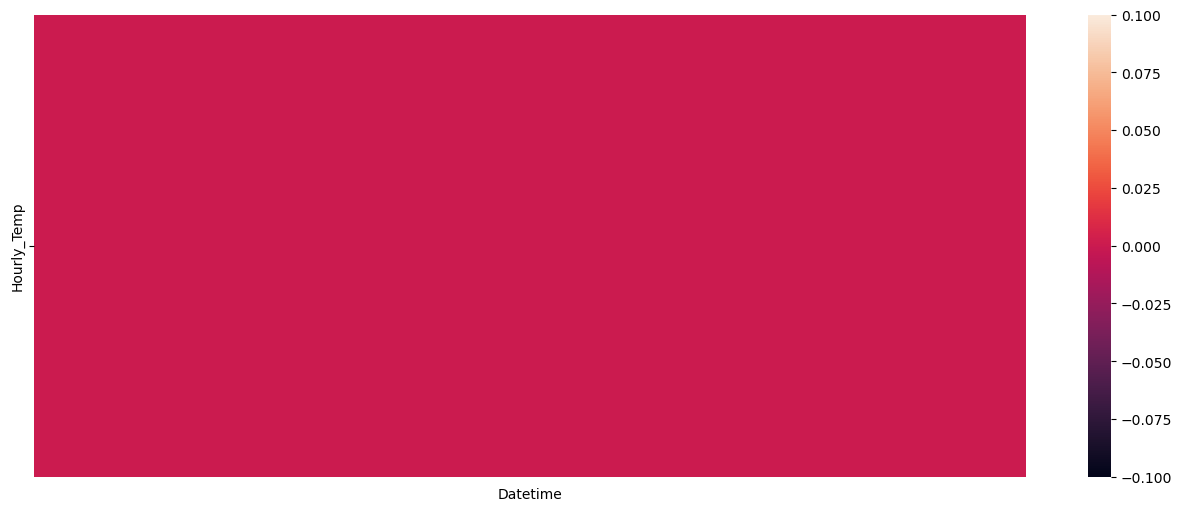

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna().transpose(),xticklabels=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hourly_Temp  7056 non-null   float64
dtypes: float64(1)
memory usage: 368.3 KB


In [11]:
col='Hourly_Temp'

<AxesSubplot: xlabel='Datetime', ylabel='Hourly_Temp'>

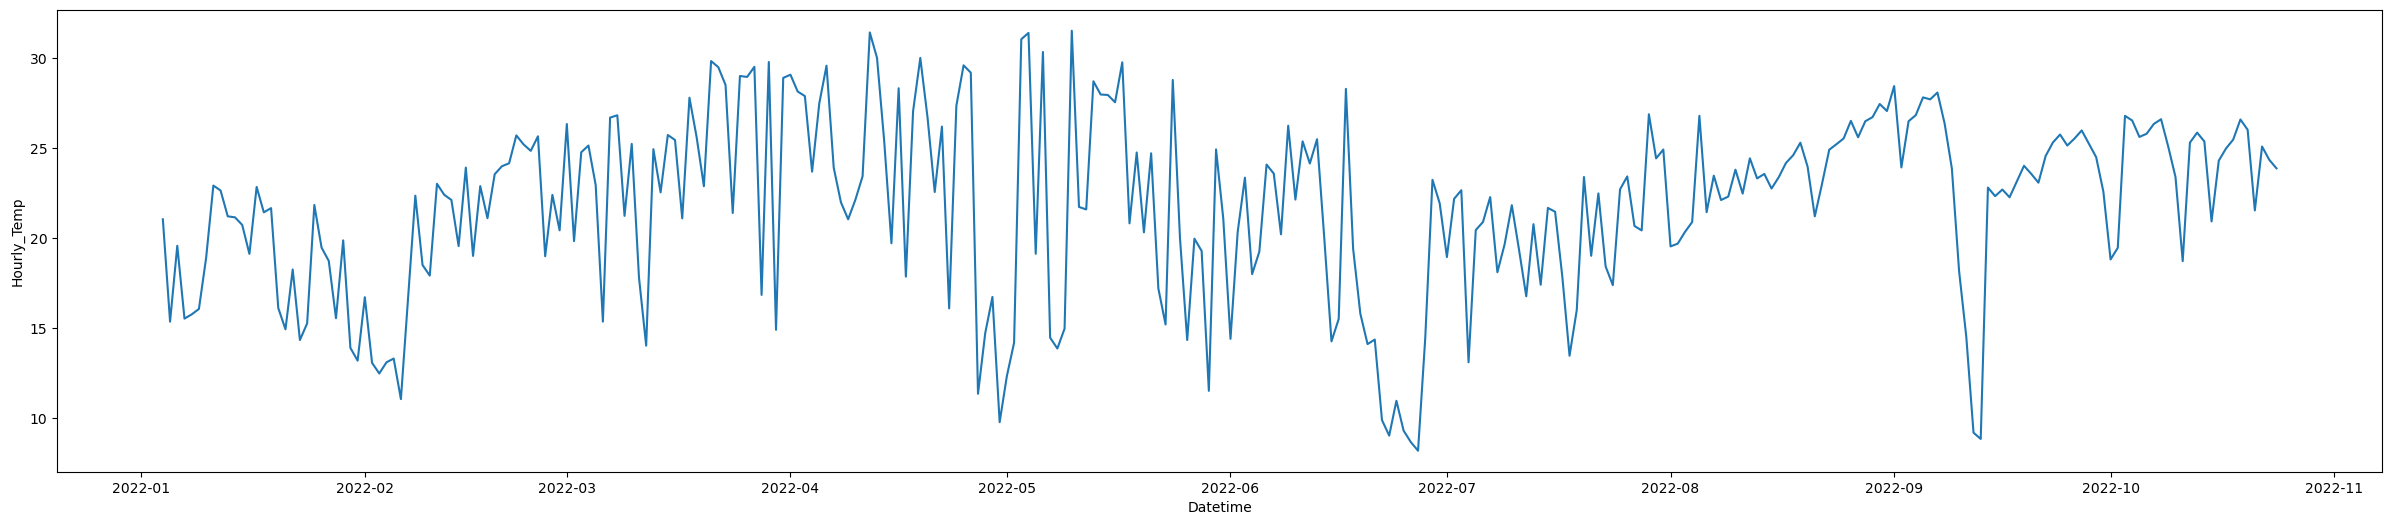

In [12]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df[col].resample('D').mean())

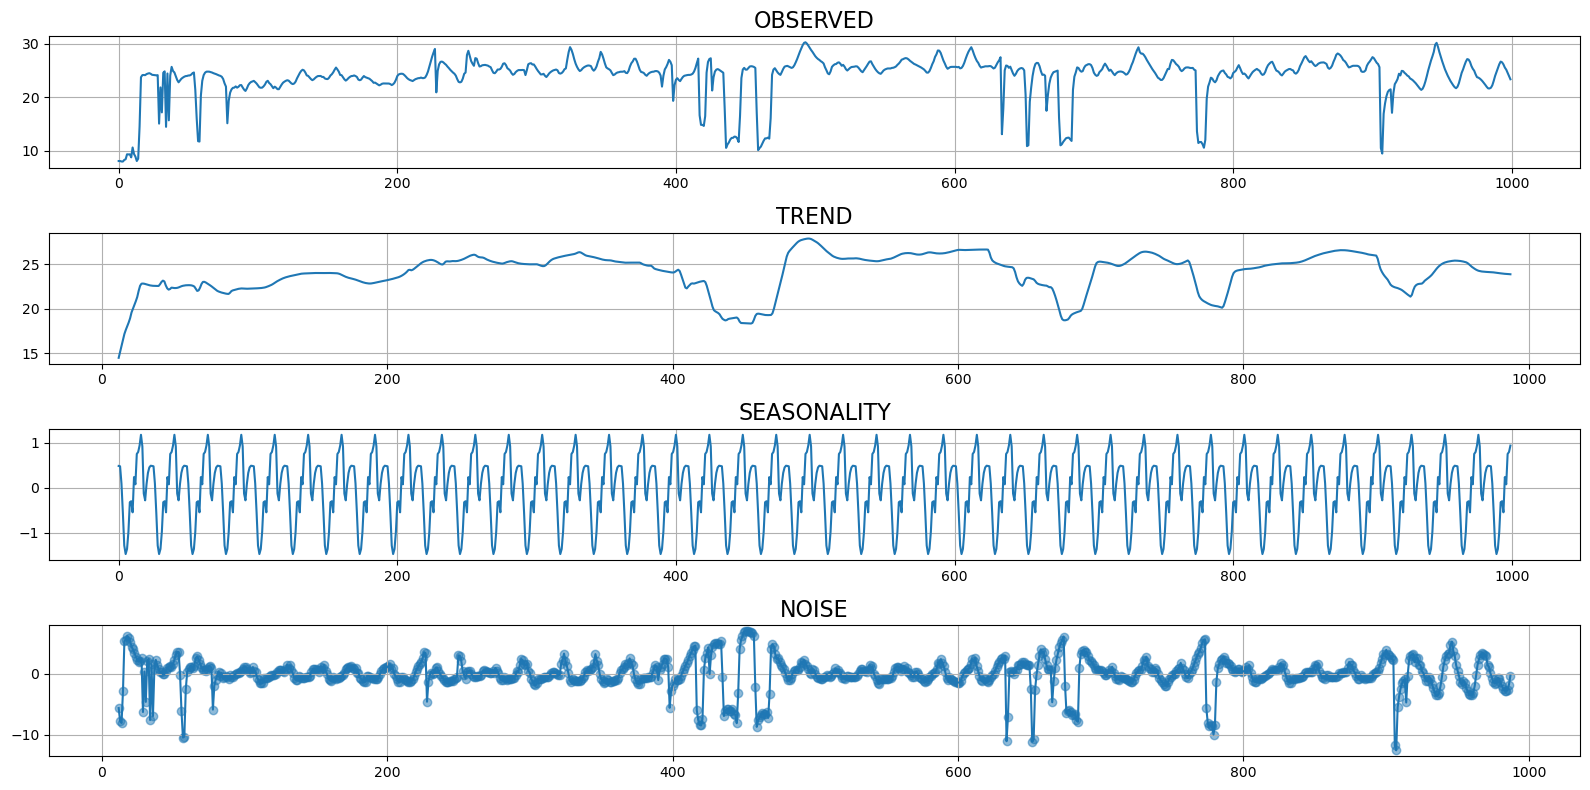

In [13]:
result = seasonal_decompose(x=df[col].iloc[-1000:].values,period=24)
plotter(result)

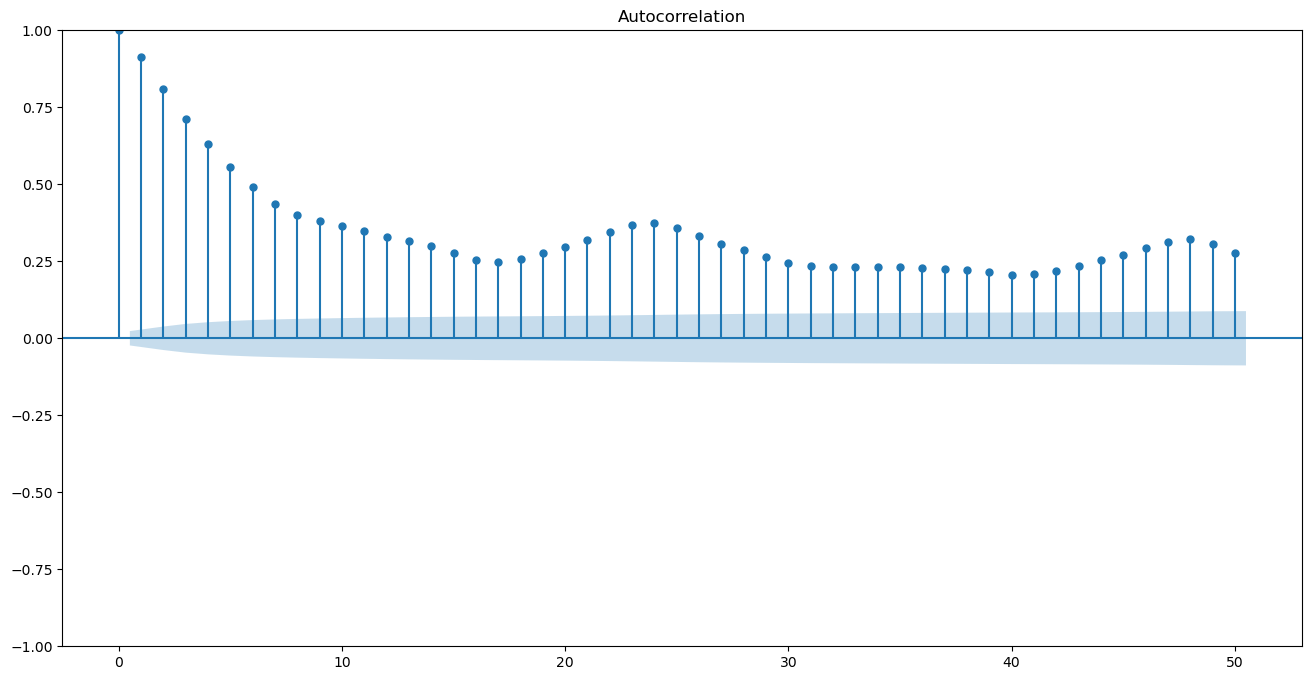

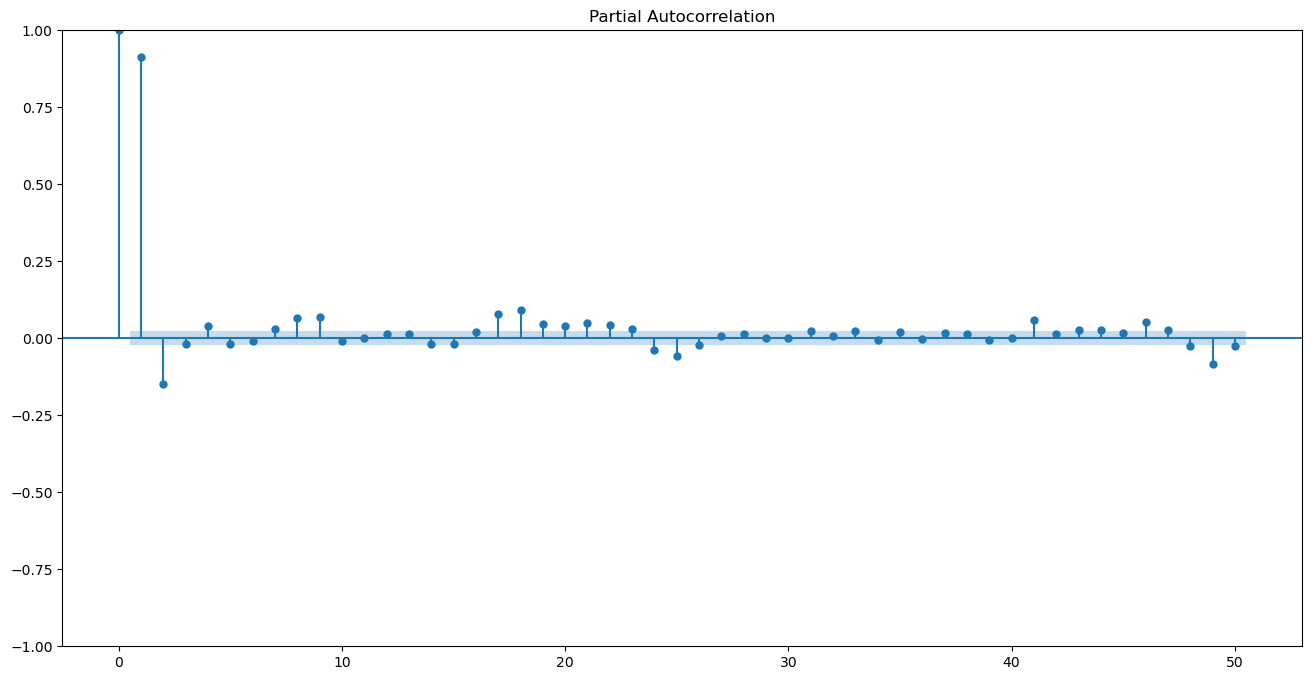

In [14]:
lagger=50

fig, ax = plt.subplots(figsize=(16,8))
fig1, ax1 = plt.subplots(figsize=(16,8))

_=plot_acf(x=df[col],ax=ax,lags=lagger)
_=plot_pacf(x=df[col],method='ywm',ax=ax1,lags=lagger)

In [15]:
lag=1
df[f'{col}_lag_{lag}']=df[col].shift(lag)

In [16]:
lag=48
df[f'{col}_lag_{lag}']=df[col].shift(lag)

In [17]:
df.dropna(inplace=True)
df.head()

,Hourly_Temp,Hourly_Temp_lag_1,Hourly_Temp_lag_48
Datetime,,,
2022-01-06 00:00:00,26.500,23.600,20.867
2022-01-06 01:00:00,25.500,26.500,21.000
2022-01-06 02:00:00,24.500,25.500,20.867
2022-01-06 03:00:00,23.633,24.500,20.650
2022-01-06 04:00:00,23.100,23.633,20.400


In [18]:
df=create_features_datetime(df)
df.head()

,Hourly_Temp,Hourly_Temp_lag_1,Hourly_Temp_lag_48,year,month,day_of_week,hour
Datetime,,,,,,,
2022-01-06 00:00:00,26.500,23.600,20.867,2022,1,3,0
2022-01-06 01:00:00,25.500,26.500,21.000,2022,1,3,1
2022-01-06 02:00:00,24.500,25.500,20.867,2022,1,3,2
2022-01-06 03:00:00,23.633,24.500,20.650,2022,1,3,3
2022-01-06 04:00:00,23.100,23.633,20.400,2022,1,3,4


In [19]:
X=df.drop([col],axis=1)
y=df[[col]]

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=24*7,shuffle=False)

In [21]:
adftest = adfuller(df['Hourly_Temp'])
print(adftest)

(-9.375783490803821, 7.173972536858616e-16, 25, 6982, {'1%': -3.431286938672534, '5%': -2.861954051452, '10%': -2.566990395634525}, 33328.52452576104)


In [22]:
df = df.asfreq('1440t')
df = df.fillna(df['Hourly_Temp'].mean())
df

,Hourly_Temp,Hourly_Temp_lag_1,Hourly_Temp_lag_48,year,month,day_of_week,hour
Datetime,,,,,,,
2022-01-06,26.500,23.600,20.867,2022,1,3,0
2022-01-07,23.967,21.350,21.333,2022,1,4,0
2022-01-08,26.750,26.200,26.500,2022,1,5,0
2022-01-09,23.500,21.167,23.967,2022,1,6,0
2022-01-10,26.767,25.700,26.750,2022,1,0,0
...,...,...,...,...,...,...,...
2022-10-20,26.780,26.967,24.883,2022,10,3,0
2022-10-21,26.217,26.471,26.750,2022,10,4,0
2022-10-22,23.383,23.533,26.780,2022,10,5,0


In [25]:
data = df[df.columns[[0]]]
data.head()

,Hourly_Temp
Datetime,
2022-01-06,26.500
2022-01-07,23.967
2022-01-08,26.750
2022-01-09,23.500
2022-01-10,26.767


In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data,order=(2,2,1),seasonal_order=(2,2,1,12))
model_fit = model.fit()

/Users/akash/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
res = model_fit.forecast(24)

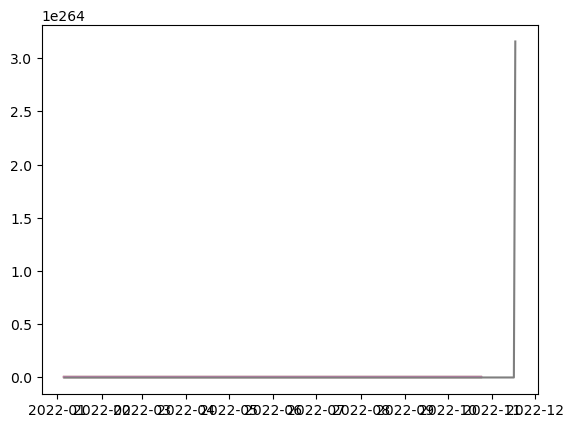

In [34]:
predictions_ARIMA_diff = pd.Series(res, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df['Hourly_Temp'].iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)